####**Q2. Train, test and report the performances using the following models on the Cats_and_Dogs_Dataset and Horse2Zebradataset.**
####**1) VGG-16**
####**2) GoogleNet**
####**3) ResNet50**
####**4) EfficientNetB0**
####**5) MobileNetV2**

#####**Horses and Zebras Dataset:**

Importing Needed Libraries:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Fetching data from kaggle using an API:

In [2]:
!pip install -q kaggle

In [3]:
!pip install tensorflow==2.8.2 !apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --allow-change-held-packages


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"geenotgee","key":"619a0d680008e42702372bd3cac5065a"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d balraj98/horse2zebra-dataset

 98% 109M/111M [00:00<00:00, 134MB/s] 
100% 111M/111M [00:00<00:00, 123MB/s]


In [9]:
! unzip horse2zebra-dataset.zip

Archive:  horse2zebra-dataset.zip
  inflating: metadata.csv            
  inflating: testA/n02381460_1000.jpg  
  inflating: testA/n02381460_1010.jpg  
  inflating: testA/n02381460_1030.jpg  
  inflating: testA/n02381460_1090.jpg  
  inflating: testA/n02381460_1100.jpg  
  inflating: testA/n02381460_1110.jpg  
  inflating: testA/n02381460_1120.jpg  
  inflating: testA/n02381460_1160.jpg  
  inflating: testA/n02381460_120.jpg  
  inflating: testA/n02381460_1210.jpg  
  inflating: testA/n02381460_1260.jpg  
  inflating: testA/n02381460_1300.jpg  
  inflating: testA/n02381460_1350.jpg  
  inflating: testA/n02381460_1360.jpg  
  inflating: testA/n02381460_140.jpg  
  inflating: testA/n02381460_1420.jpg  
  inflating: testA/n02381460_1540.jpg  
  inflating: testA/n02381460_1620.jpg  
  inflating: testA/n02381460_1630.jpg  
  inflating: testA/n02381460_1660.jpg  
  inflating: testA/n02381460_1690.jpg  
  inflating: testA/n02381460_1740.jpg  
  inflating: testA/n02381460_1750.jpg  
  inflatin

In [10]:
import pandas as pd
df = pd.read_csv('metadata.csv')
df.head()

,image_id,domain,split,image_path
0,n02381460_1000,B (Zebra),test,testB/n02381460_1000.jpg
1,n02381460_1001,A (Horse),train,trainA/n02381460_1001.jpg
2,n02381460_1002,A (Horse),train,trainA/n02381460_1002.jpg
3,n02381460_1003,A (Horse),train,trainA/n02381460_1003.jpg
4,n02381460_1006,A (Horse),train,trainA/n02381460_1006.jpg


* A = Horse Data
* B = Zebra Data

#####**Preprocessing the Data:**

In [11]:
import os
import shutil

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In order for ImageDataGenerator to work, our classes must be present as subfolderswithin the actual testing and training sets. Manually do the following:
* Create two folders, "test" and "train"
* Move "testA" and "testB" under "test"
* Move "trainA" and "trainB" under "train"


**But still only provide the paths of "test" and "train"

In [15]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rotation_range=15,
                                       rescale=1./255,
                                       shear_range=0.1,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/test',  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224 (size of input used to train pre-trained model)
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


Found 260 images belonging to 2 classes.


In [16]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = test_datagen.flow_from_directory(
        '/content/train',
        target_size=(227, 227),
        batch_size=10,
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [17]:
print('total training horse images:', len(os.listdir('/content/test/testA')))
print('total training zebra images:', len(os.listdir('/content/test/testB')))
print('total validation horse images:', len(os.listdir('/content/train/trainA')))
print('total validation zebra images:', len(os.listdir('/content/train/trainB')))

total training horse images: 120
total training zebra images: 140
total validation horse images: 1067
total validation zebra images: 1334


####**1) VGG-16**

Creating the base model:

In [18]:
from keras.applications.vgg16 import VGG16
base_model_vgg_16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_vgg_16.trainable = False #freeze the layers
base_model_vgg_16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

Building on the base model and compiling it:

In [19]:
model = tf.keras.Sequential([
    base_model_vgg_16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


Fitting the model:

In [21]:
history = model.fit(
train_generator,
      epochs=10,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/10
26/26 [==============================] - 19s 755ms/step - loss: 0.2903 - acc: 0.9000 - val_loss: 0.2798 - val_acc: 0.8934
Epoch 2/10
26/26 [==============================] - 19s 772ms/step - loss: 0.2403 - acc: 0.9231 - val_loss: 0.2380 - val_acc: 0.9171
Epoch 3/10
26/26 [==============================] - 20s 789ms/step - loss: 0.2214 - acc: 0.9192 - val_loss: 0.2297 - val_acc: 0.9167
Epoch 4/10
26/26 [==============================] - 20s 775ms/step - loss: 0.1972 - acc: 0.9269 - val_loss: 0.2016 - val_acc: 0.9288
Epoch 5/10
26/26 [==============================] - 19s 767ms/step - loss: 0.1695 - acc: 0.9538 - val_loss: 0.1883 - val_acc: 0.9367
Epoch 6/10
26/26 [==============================] - 19s 766ms/step - loss: 0.1495 - acc: 0.9615 - val_loss: 0.1848 - val_acc: 0.9334
Epoch 7/10
26/26 [==============================] - 19s 770ms/step - loss: 0.1417 - acc: 0.9538 - val_loss: 0.1726 - val_acc: 0.9429
Epoch 8/10
26/26 [==============================] - 20s 774ms/step - 

Performance of the model:

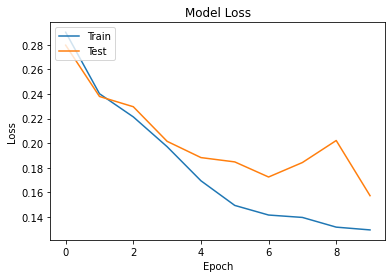

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

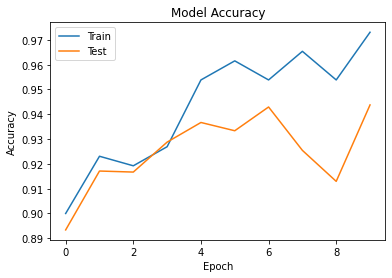

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

####**2) GoogLeNet**

Creating the Base Model:

In [25]:
from tensorflow.keras.applications import InceptionV3
base_model_inception = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_inception.trainable = False #freeze the layers
base_model_inception.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

Building on the Base Model and Compiling it:

In [26]:
model_inception = tf.keras.Sequential([
    base_model_inception,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_inception.summary()

model_inception.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


Fitting the Model:

In [28]:
history_inception = model_inception.fit(
train_generator,
      epochs=10,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/10
26/26 [==============================] - 14s 536ms/step - loss: 0.1407 - acc: 0.9654 - val_loss: 0.0321 - val_acc: 0.9883
Epoch 2/10
26/26 [==============================] - 12s 455ms/step - loss: 0.0388 - acc: 0.9846 - val_loss: 0.0360 - val_acc: 0.9879
Epoch 3/10
26/26 [==============================] - 12s 459ms/step - loss: 0.0368 - acc: 0.9885 - val_loss: 0.0417 - val_acc: 0.9846
Epoch 4/10
26/26 [==============================] - 12s 458ms/step - loss: 0.0185 - acc: 0.9962 - val_loss: 0.0479 - val_acc: 0.9846
Epoch 5/10
26/26 [==============================] - 11s 454ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0569 - val_acc: 0.9829
Epoch 6/10
26/26 [==============================] - 11s 453ms/step - loss: 0.0247 - acc: 0.9885 - val_loss: 0.0552 - val_acc: 0.9846
Epoch 7/10
26/26 [==============================] - 12s 455ms/step - loss: 0.0216 - acc: 0.9923 - val_loss: 0.0525 - val_acc: 0.9846
Epoch 8/10
26/26 [==============================] - 11s 450ms/step - 

Performance of the Model:

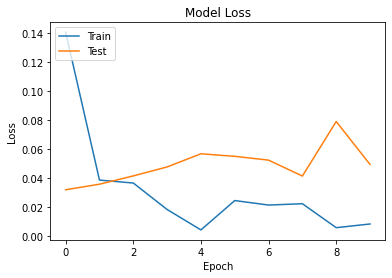

In [29]:
plt.plot(history_inception.history['loss'])
plt.plot(history_inception.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

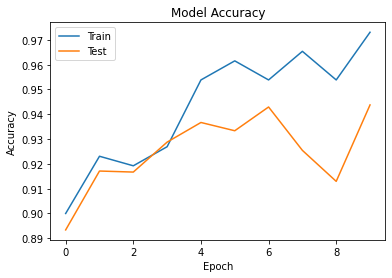

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

####**3) ResNet-50**

Creating the base model:

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model_resnet = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_resnet.trainable = False #freeze the layers
base_model_resnet.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

Building on the base model and compiling it:

In [32]:
model_resnet = tf.keras.Sequential([
    base_model_resnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_resnet.summary()

model_resnet.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


Fitting the model:

In [34]:
history_resnet = model_resnet.fit(
train_generator,
      steps_per_epoch=27, 
      epochs=10,
      validation_data=validation_generator,
      verbose=1)

Epoch 1/10


InvalidArgumentError: ignored

Performance of the model:

In [ ]:
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_resnet.history['acc'])
plt.plot(history_resnet.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

####**4) EfficientNetB0**

Creating the base model:

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_model_efficientnet = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_efficientnet.trainable = False #freeze the layers
base_model_efficientnet.summary()

Building on the base model and compiling it:

In [ ]:
model_efficientnet = tf.keras.Sequential([
    base_model_efficientnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_efficientnet.summary()

model_efficientnet.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Fitting the model:

In [ ]:
history_efficientnet = model_efficientnet.fit(
train_generator,
      epochs=10,
      validation_data=validation_generator,
      verbose=1)

Performance of the model:

In [ ]:
plt.plot(history_efficientnet.history['loss'])
plt.plot(history_efficientnet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_efficientnet.history['acc'])
plt.plot(history_efficientnet.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

####**5) MobileNetV2**

Creating the base model:

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
base_model_mobilenet = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_mobilenet.trainable = False #freeze the layers
base_model_mobilenet.summary()

Building on the base model and compiling it:

In [ ]:
model_mobilenet = tf.keras.Sequential([
    base_model_mobilenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_mobilenet.summary()

model_mobilenet.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Fitting the model:

In [ ]:
history_mobilenet = model_mobilenet.fit(
train_generator,
      epochs=10,
      validation_data=validation_generator,
      verbose=1)

Performance of the model:

In [ ]:
plt.plot(history_mobilenet.history['loss'])
plt.plot(history_mobilenet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_mobilenet.history['acc'])
plt.plot(history_mobilenet.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()